In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb

In [7]:
%run init-optical_elements.ipynb

# Objetivos

- [ ] Encontrar os problemas no qiskit ou nas contas

# Contas

## Dentro do IMZ após a HWP -  $\Psi_2$

<img src = 'setup_realism.jpg' width = '90%'>

### Estado inicial

In [8]:
ψi_ABbWZa = pket('000110')
mbk(ψi_ABbWZa)

#### BBO$_p$

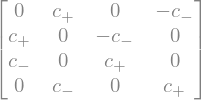

In [9]:
simplify(BBOp_ct, rational=True)

In [10]:
ψ0_ABbWZa = psi_ctrl(ψi_ABbWZa, BBOp_ct, 0, 1)
mbk(ψ0_ABbWZa)

#### PBS

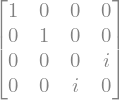

In [11]:
mysim(PBS_ct)

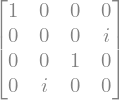

In [12]:
PBS_tc = troca_qubit_rho(PBS_ct, 0, 1)
mysim(PBS_tc)

In [13]:
ψ1_ABbWZa = psi_ctrl(ψ0_ABbWZa, PBS_ct, 1, 2)
mysim(mbk(ψ1_ABbWZa))

#### HWP

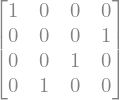

In [14]:
simplify(HWP_tc)

In [15]:
ψ2_ABbWZa = psi_ctrl(ψ1_ABbWZa, HWP_tc, 1, 2)
mysim(mbk(ψ2_ABbWZa))

### QWP$_{in}$ - $\Psi_2$, projetando em $A$ e traçando $B$ e $a$

#### QWP e PBS$_A$

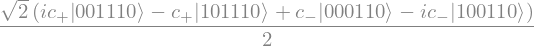

In [16]:
ψ2p_ABbWZa_in = psi_gate(ψ2_ABbWZa, QWP, 0)
mysim(mbk(ψ2p_ABbWZa_in))

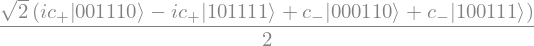

In [17]:
ψ2p_ABbWZa_in = psi_ctrl(ψ2p_ABbWZa_in, PBS_ct, 0, 5)
mysim(mbk(ψ2p_ABbWZa_in))

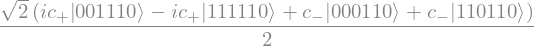

In [18]:
ψ2p_AbWZaB_in = troca_qubit(ψ2p_ABbWZa_in, 1, 5)
ψ2p_AabWZB_in = troca_qubit(ψ2p_AbWZaB_in, 4, 1)
mysim(mbk(ψ2p_AabWZB_in))

Que fecha com o resutado teórico obtico. Podemos ainda escrever o estado da seguinte forma:
\begin{align*}
\left\vert \Psi_{2}^{\prime}\right\rangle  &  =\frac{1}{\sqrt{2}}\left[
\left\vert 00\right\rangle _{Aa}\left(  c_{-}\left\vert 0\right\rangle
_{b}+ic_{+}\left\vert 1\right\rangle _{b}\right)  +\left\vert 11\right\rangle
_{Aa}\left(  c_{-}\left\vert 0\right\rangle _{b}-ic_{+}\left\vert
1\right\rangle _{b}\right)  \right]  \left\vert 11\right\rangle _{WZ}%
\left\vert 0\right\rangle _{B}\\
&  =\frac{1}{\sqrt{2}}\left(  \left\vert 00\right\rangle _{Aa}\left\vert
\beta_{0}\right\rangle +\left\vert 11\right\rangle _{Aa}\left\vert \beta
_{1}\right\rangle \right)  \left\vert 11\right\rangle _{WZ}\left\vert
0\right\rangle _{B}%
\end{align*}
onde
\begin{equation}
\left\vert \beta_{k}\right\rangle =c_{-}\left\vert 0\right\rangle _{b}%
+ic_{+}\left(  -1\right)  ^{k}\left\vert 1\right\rangle _{b}.
\end{equation}

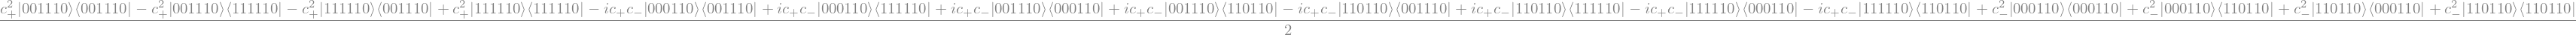

In [24]:
ρ2p_AabWZB_in = proj(ψ2p_AabWZB_in)
mysim(mbk(ρ2p_AabWZB_in))

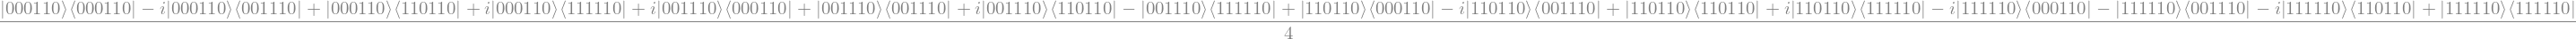

In [25]:
mysim(mbk(ρ2p_AabWZB_in.subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))))

In [26]:
ρ2p_00bWZB_in = projM(16, '00', ρ2p_AabWZB_in)
mysim(mbk(ρ2p_00bWZB_in)).subs(cp**2+cm**2, 1)

In [27]:
von_neumann_sympy(ρ2p_00bWZB_in)

In [36]:
ρ2p_00bWZB_deph_in = dephasing_map_4qubits(ρ2p_00bWZB_in)
mysim(mbk(ρ2p_00bWZB_deph_in)).subs(cp**2+cm**2, 1)

In [31]:
von_neumann_sympy(ρ2p_00bWZB_deph_in).subs(cp**2+cm**2, 1)

In [39]:
Irr_b_in = von_neumann_sympy(ρ2p_00bWZB_deph_in).subs(cp**2+cm**2, 1) - von_neumann_sympy(ρ2p_00bWZB_in)
Irr_b_in

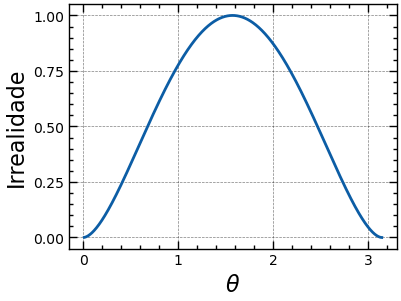

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def func(theta):
    c_plus = np.cos(theta/2)
    c_minus = np.sqrt(1 - c_plus**2)
    return -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)

theta_vals = np.linspace(0.01, np.pi, 1000)
y_vals = func(theta_vals)

plt.figure(figsize = (4,3), constrained_layout = True)
plt.style.use(['science', 'notebook', 'grid'])
plt.plot(theta_vals, y_vals)
plt.xlabel(r'$\theta$')
plt.ylabel('Irrealidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('Gráfico da função')
plt.show()


### QWP$_{out}$ - $\Psi_2$, projetando em $A$ e traçando $B$ e $a$

#### PBS$_A$

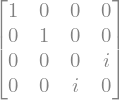

In [41]:
mysim(PBS_ct)

In [42]:
mbk(ψ2_ABbWZa)

In [43]:
ψ2p_ABbWZa_out = psi_ctrl(ψ2_ABbWZa, PBS_ct, 0, 5)
mysim(mbk(ψ2p_ABbWZa_out))

In [47]:
ψ2p_AabWZB_out = troca_qubit(ψ2p_ABbWZa_out, 5, 1)
mysim(mbk(ψ2p_AabWZB_out))

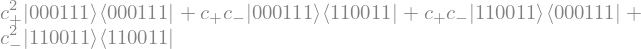

In [48]:
ρ2p_AabWZB_out = proj(ψ2p_AabWZB_out)
mysim(mbk(ρ2p_AabWZB_out))

In [49]:
ρ2p_00bWZB_out = projM(16, '00', ρ2p_AabWZB_out)
mysim(mbk(ρ2p_00bWZB_out))

In [38]:
von_neumann_sympy(ρ2p_00bWZB_out)

In [39]:
ρ2p_0bWZ_trBa_deph_out = dephasing_map_3qubits(ρ2p_0bWZ_trBa_out)
mysim(mbk(ρ2p_0bWZ_trBa_deph_out)).subs(cp**2+cm**2, 1)

In [40]:
von_neumann_sympy(ρ2p_0bWZ_trBa_deph_out)

In [41]:
Irr_b_out = von_neumann_sympy(ρ2p_0bWZ_trBa_deph_out) - von_neumann_sympy(ρ2p_0bWZ_trBa_out)
Irr_b_out

# Fora do IMZ após a HWP -  $\Psi_5$

<img src = 'setup_realism.jpg' width = '90%'>

### Estado inicial

In [50]:
ψi_ABbWZa = pket('000110')
mbk(ψi_ABbWZa)

#### BBO$_p$

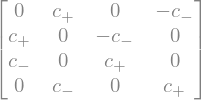

In [51]:
simplify(BBOp_ct, rational=True)

In [52]:
ψ0_ABbWZa = psi_ctrl(ψi_ABbWZa, BBOp_ct, 0, 1)
mbk(ψ0_ABbWZa)

#### PBS

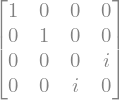

In [53]:
mysim(PBS_ct)

In [54]:
ψ1_ABbWZa = psi_ctrl(ψ0_ABbWZa, PBS_ct, 1, 2)
mysim(mbk(ψ1_ABbWZa))

#### HWP

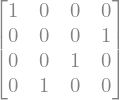

In [55]:
simplify(HWP_tc)

In [56]:
ψ2_ABbWZa = psi_ctrl(ψ1_ABbWZa, HWP_tc, 1, 2)
mysim(mbk(ψ2_ABbWZa))

#### Excitação dos átomos

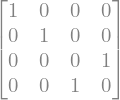

In [57]:
CNOT_ct

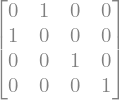

In [58]:
CNOT0_ct = tp(pauli(1),pauli(1)) * CNOT_ct * tp(pauli(1),pauli(1))
CNOT0_ct

In [60]:
for j,k in product(range(2), repeat=2):
    print('|{}{}>'.format(j,k))
    display(mysim(mbk(CNOT0_ct * pket(str(j)+str(k)))))

|00>


|01>


|10>


|11>


In [59]:
ψ3_ABbWZa = psi_ctrl(ψ2_ABbWZa, CNOT0_ct, 2, 3)
mysim(mbk(ψ3_ABbWZa))

In [60]:
ψ3_ABbWZa = psi_ctrl(ψ3_ABbWZa, CNOT_ct, 2, 4)
mysim(mbk(ψ3_ABbWZa))

#### Espelhos

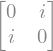

In [61]:
mysim(M)

In [62]:
ψ4_ABbWZa = psi_gate(ψ3_ABbWZa, M, 2)
mysim(mbk(ψ4_ABbWZa))

#### BS

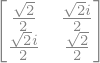

In [63]:
mysim(BS)

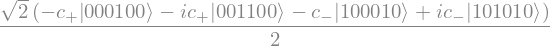

In [64]:
ψ5_ABbWZa = psi_gate(ψ4_ABbWZa, BS, 2)
mysim(mbk(ψ5_ABbWZa))

### QWP$_{in}$ - $\Psi_5^{\prime}$, projetando em $A$ e traçando $B$ e $a$

#### QWP e PBS$_A$

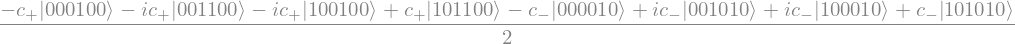

In [65]:
ψ5p_ABbWZa_in = psi_gate(ψ5_ABbWZa, QWP, 0)
mysim(mbk(ψ5p_ABbWZa_in))

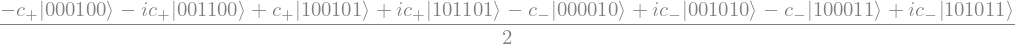

In [66]:
ψ5p_ABbWZa_in = psi_ctrl(ψ5p_ABbWZa_in, PBS_ct, 0, 5)
mysim(mbk(ψ5p_ABbWZa_in))

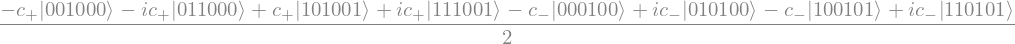

In [67]:
ψ5p_AbWZBa_in = troca_qubit(ψ5p_ABbWZa_in, 1,4)
mysim(mbk(ψ5p_AbWZBa_in))

Que fecha com o resutado teórico obtico. Podemos ainda escrever o estado da seguinte forma:
\begin{equation}
\left\vert \Psi_{5}^{\prime}\right\rangle =\frac{1}{2}\left\{
\begin{array}
[c]{c}
-c_{+}\left\vert 0\right\rangle _{A}\left\vert 0\right\rangle _{b}\left\vert
10\right\rangle _{WZ}\left\vert 00\right\rangle _{Ba}\\
-ic_{+}\left\vert 0\right\rangle _{A}\left\vert 1\right\rangle _{b}\left\vert
10\right\rangle _{WZ}\left\vert 00\right\rangle _{Ba}\\
+c_{+}\left\vert 1\right\rangle _{A}\left\vert 0\right\rangle _{b}\left\vert
10\right\rangle _{WZ}\left\vert 01\right\rangle _{Ba}\\
ic_{+}\left\vert 1\right\rangle _{A}\left\vert 1\right\rangle _{b}\left\vert
10\right\rangle _{WZ}\left\vert 01\right\rangle _{Ba}\\
-c_{-}\left\vert 0\right\rangle _{A}\left\vert 0\right\rangle _{b}\left\vert
01\right\rangle _{WZ}\left\vert 00\right\rangle _{B}\\
+ic_{-}\left\vert 0\right\rangle _{A}\left\vert 1\right\rangle _{b}\left\vert
01\right\rangle _{WZ}\left\vert 00\right\rangle _{Ba}\\
-c_{-}\left\vert 1\right\rangle _{A}\left\vert 0\right\rangle _{b}\left\vert
01\right\rangle _{WZ}\left\vert 01\right\rangle _{Ba}\\
+ic_{-}\left\vert 1\right\rangle _{A}\left\vert 1\right\rangle _{b}\left\vert
01\right\rangle _{WZ}\left\vert 01\right\rangle _{Ba}
\end{array}
\right\}
\end{equation}
ou ainda
\begin{equation}
\left\vert \Psi_{5}^{\prime}\right\rangle =-\frac{1}{2}\left\{  \left\vert
00\right\rangle _{Aa}\left[  \left\vert 0\right\rangle _{b}\left\vert \Psi
_{+}^{c}\right\rangle _{WZ}+i\left\vert 1\right\rangle _{b}\left\vert \Psi
_{-}^{c}\right\rangle _{WZ}\right]  +\left\vert 11\right\rangle _{Aa}\left[
\left\vert 0\right\rangle _{b}\left\vert \Psi_{-}^{c}\right\rangle
_{WZ}-i\left\vert 1\right\rangle _{b}\left\vert \Psi_{+}^{c}\right\rangle
_{WZ}\right]  \right\}  \left\vert 0\right\rangle _{B}
\end{equation}
onde
\begin{equation}
\left\vert \Psi_{\pm}^{c}\right\rangle _{WZ}=c_{-}\left\vert 01\right\rangle
_{WZ}\pm c_{+}\left\vert 10\right\rangle _{WZ}.
\end{equation}

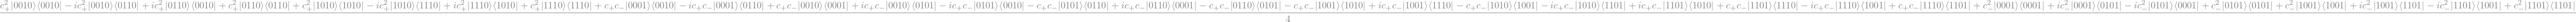

In [60]:
ρ5p_AbWZ_trBa_in = ptraceB(16, 4, proj(ψ5p_AbWZBa_in))
mysim(mbk(ρ5p_AbWZ_trBa_in))

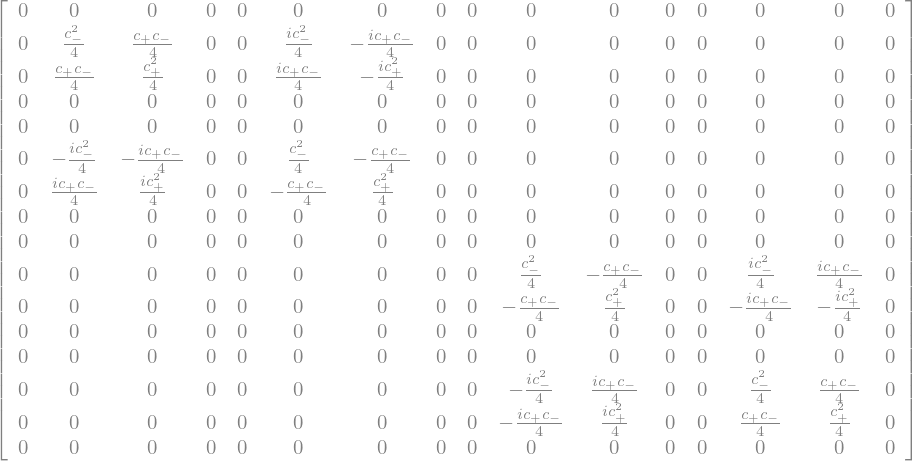

In [79]:
mysim(ρ5p_AbWZ_trBa_in)

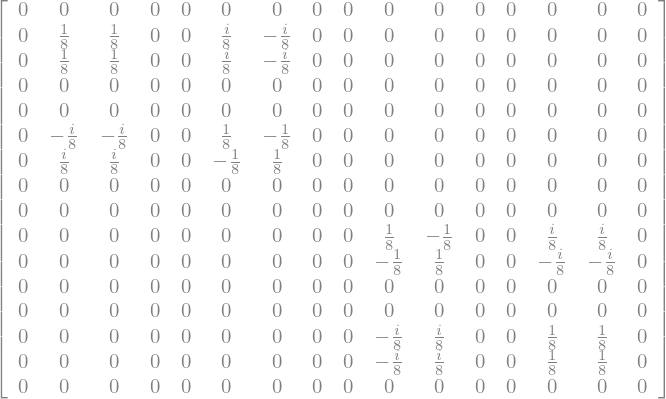

In [80]:
mysim(ρ5p_AbWZ_trBa_in).subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))

In [61]:
ρ5p_00WZ_trBa_in = projM(4, '00', ρ5p_AbWZ_trBa_in)
mysim(mbk(ρ5p_00WZ_trBa_in)).subs(cp**2+cm**2, 1)

In [62]:
von_neumann_sympy(ρ5p_00WZ_trBa_in)

In [63]:
ρ5p_00WZ_trBa_deph_in = dephasing_map_2qubits(ρ5p_00WZ_trBa_in)
mysim(mbk(ρ5p_00WZ_trBa_deph_in)).subs(cp**2+cm**2, 1)

In [64]:
mysim(von_neumann_sympy(ρ5p_00WZ_trBa_deph_in).subs(cp**2+cm**2, 1))

In [65]:
Irr_WZ_in = von_neumann_sympy(ρ5p_00WZ_trBa_deph_in).subs(cp**2+cm**2, 1) - von_neumann_sympy(ρ5p_00WZ_trBa_in)
mysim(Irr_WZ_in)

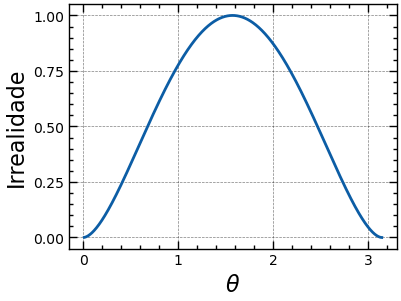

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def func(theta):
    c_plus = np.cos(theta/2)
    c_minus = np.sqrt(1 - c_plus**2)
    return -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)

theta_vals = np.linspace(0.01, np.pi, 1000)
y_vals = func(theta_vals)

plt.figure(figsize = (4,3), constrained_layout = True)
plt.style.use(['science', 'notebook', 'grid'])
plt.plot(theta_vals, y_vals)
plt.xlabel(r'$\theta$')
plt.ylabel('Irrealidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('Gráfico da função')
plt.show()


### QWP$_{out}$ - $\Psi_2$, projetando em $A$ e traçando $B$ e $a$

#### PBS$_A$

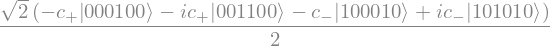

In [67]:
mysim(mbk(ψ5_ABbWZa))

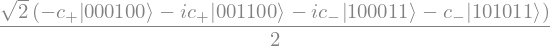

In [68]:
ψ5p_ABbWZa_out = psi_ctrl(ψ5_ABbWZa, PBS_ct, 0, 5)
mysim(mbk(ψ5p_ABbWZa_out))

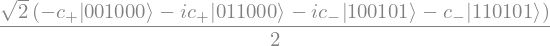

In [69]:
ψ5p_AbWZBa_out = troca_qubit(ψ5p_ABbWZa_out, 1, 4)
mysim(mbk(ψ5p_AbWZBa_out))

Que fecha com o resutado teórico obtico. Podemos ainda escrever o estado da seguinte forma:
\begin{align*}
\left\vert \Psi_{5}^{\prime\prime}\right\rangle  &  =-\frac{1}{\sqrt{2}
}U_{PBS_{A}}\left[  c_{+}\left\vert 00\right\rangle _{Aa}\left(  \left\vert
0\right\rangle _{b}+i\left\vert 1\right\rangle _{b}\right)  \left\vert
10\right\rangle _{WZ}-ic_{-}\left\vert 10\right\rangle _{Aa}\left(
i\left\vert 0\right\rangle _{b}+\left\vert 1\right\rangle _{b}\right)
\left\vert 01\right\rangle _{WZ}\right]  \left\vert 0\right\rangle _{B}\\
&  =-\frac{1}{\sqrt{2}}\left[  c_{+}\left\vert 00\right\rangle _{Aa}\left(
\left\vert 0\right\rangle _{b}+i\left\vert 1\right\rangle _{b}\right)
\left\vert 10\right\rangle _{WZ}+c_{-}\left\vert 11\right\rangle _{Aa}\left(
i\left\vert 0\right\rangle _{b}+\left\vert 1\right\rangle _{b}\right)
\left\vert 01\right\rangle _{WZ}\right]  \left\vert 0\right\rangle _{B}\\
\left\vert \Psi_{5}^{\prime\prime}\right\rangle _{AabWZB} &  =-\frac{1}
{\sqrt{2}}\left(
\begin{array}
[c]{c}
c_{+}\left\vert 0\right\rangle _{A}\left\vert 0\right\rangle _{b}\left\vert
10\right\rangle _{WZ}\left\vert 00\right\rangle _{Ba}\\
+ic_{+}\left\vert 0\right\rangle _{A}\left\vert 1\right\rangle _{b}\left\vert
10\right\rangle _{WZ}\left\vert 00\right\rangle _{Ba}\\
+ic_{-}\left\vert 1\right\rangle _{A}\left\vert 0\right\rangle _{b}\left\vert
01\right\rangle _{WZ}\left\vert 01\right\rangle _{Ba}\\
+c_{-}\left\vert 1\right\rangle _{A}\left\vert 1\right\rangle _{b}\left\vert
01\right\rangle _{WZ}\left\vert 01\right\rangle _{Ba}
\end{array}
\right)  .
\end{align*}

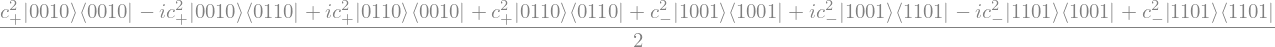

In [70]:
ρ5p_AbWZ_trBa_out = ptraceB(16, 4, proj(ψ5p_AbWZBa_out))
mysim(mbk(ρ5p_AbWZ_trBa_out))

In [71]:
ρ5p_00WZ_trBa_out = projM(4, '00', ρ5p_AbWZ_trBa_out)
mysim(mbk(ρ5p_00WZ_trBa_out)).subs(cp**2+cm**2, 1)

In [72]:
von_neumann_sympy(ρ5p_00WZ_trBa_out)

In [73]:
ρ5p_00WZ_trBa_deph_out = dephasing_map_2qubits(ρ5p_00WZ_trBa_out)
mysim(mbk(ρ5p_00WZ_trBa_deph_out)).subs(cp**2+cm**2, 1)

In [74]:
von_neumann_sympy(ρ5p_00WZ_trBa_deph_out).subs(cp**2+cm**2, 1)

In [75]:
Irr_WZ_out = von_neumann_sympy(ρ5p_00WZ_trBa_deph_out).subs(cp**2+cm**2, 1) - von_neumann_sympy(ρ5p_00WZ_trBa_out)
Irr_WZ_out

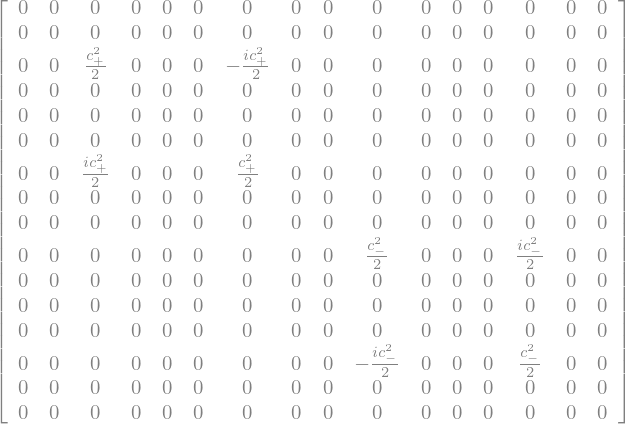

In [81]:
mysim(ρ5p_AbWZ_trBa_out)

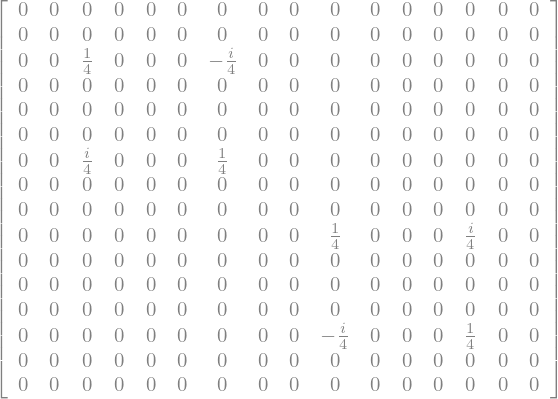

In [82]:
mysim(ρ5p_AbWZ_trBa_out).subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))